In [4]:
from tensorflow.keras.datasets import mnist

(train_data, train_label), (test_data, test_label) = mnist.load_data()

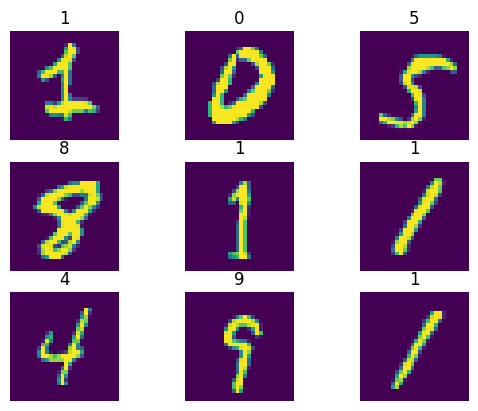

In [5]:
import matplotlib.pyplot as plt
import random


fig, axs = plt.subplots(3, 3)

axs = axs.flatten()

for i in range(9):
    random_int = random.randint(0, len(train_data))
    image = train_data[random_int]
    label = train_label[random_int]

    axs[i].imshow(image)
    axs[i].set_title(label)
    axs[i].set_axis_off()

In [6]:
from keras.utils import to_categorical

train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [7]:
from keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten()) 
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(train_label.shape[1], activation='softmax'))

model.compile(optimizer='Adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

/home/plorenc/Desktop/AiR_ISS/OpenCL/lab3/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-29 17:49:17.621729: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-29 17:49:17.657375: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gp

In [8]:
from sklearn.model_selection import train_test_split

x_train = train_data
y_train = train_label

x_val, x_test, y_val, x_test = train_test_split(test_data, test_label, test_size=0.5)

In [9]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=512,
    validation_data=(x_val, y_val) 
)

Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.6487 - loss: 3.7224 - val_accuracy: 0.9590 - val_loss: 0.1344
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.9652 - loss: 0.1179 - val_accuracy: 0.9784 - val_loss: 0.0760
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.9799 - loss: 0.0659 - val_accuracy: 0.9806 - val_loss: 0.0648
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.9860 - loss: 0.0442 - val_accuracy: 0.9792 - val_loss: 0.0696
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.9895 - loss: 0.0339 - val_accuracy: 0.9838 - val_loss: 0.0563


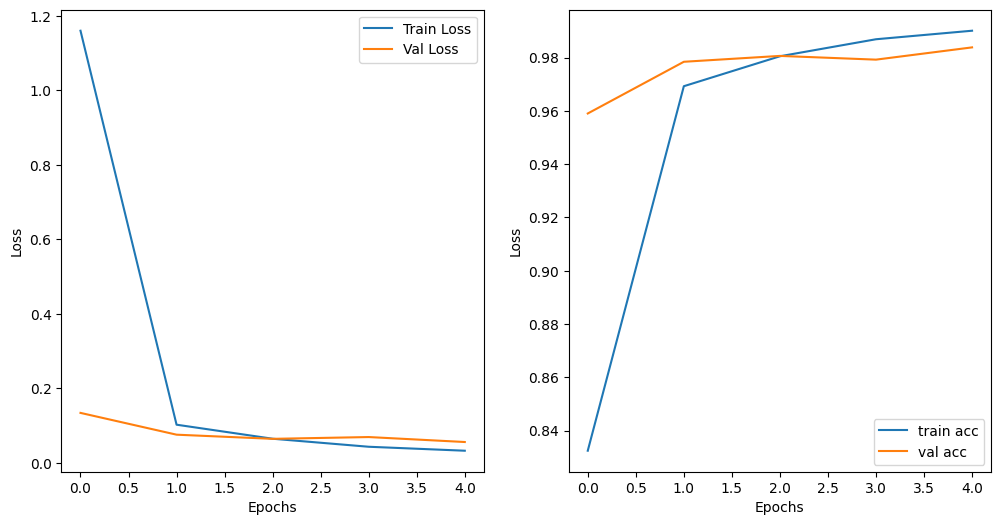

In [10]:
history_dict = history.history

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(history_dict['loss'], label='Train Loss')
axs[0].plot(history_dict['val_loss'], label='Val Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(history_dict['accuracy'], label='train acc')
axs[1].plot(history_dict['val_accuracy'], label='val acc')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

### Własny dataset

### Keras :(

In [11]:
from tensorflow.keras.preprocessing import  image_dataset_from_directory

train_dir = r'/home/plorenc/Desktop/AiR_ISS/ML/datasets/dataset_cats_dogs'

train_dataset = image_dataset_from_directory(
    train_dir,  # Ścieżka do folderu
    labels="inferred", 
    label_mode="binary",  # Zastosowanie binarnej klasyfikacji
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150, 150),  # Zmiana rozmiaru obrazków na 150x150
    shuffle=True,
    validation_split=0.2,  # 20% danych przeznaczymy na walidację
    subset="training",  # Zbiór treningowy
    seed=42
)

validation_dataset = image_dataset_from_directory(
    train_dir,
    labels="inferred", 
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150, 150),
    shuffle=True,
    validation_split=0.2,  # 20% danych przeznaczymy na walidację
    subset="validation",  # Zbiór walidacyjny
    seed=42
)

Found 4000 files belonging to 2 classes.
Using 3200 files for training.
Found 4000 files belonging to 2 classes.
Using 800 files for validation.


In [12]:
model2 = Sequential([
    layers.Rescaling(1./255, input_shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),  # Pierwsza warstwa FC
    layers.Dense(256, activation='relu'),  # Druga warstwa FC
    layers.Dense(1, activation='sigmoid')  # Warstwa wyjściowa
])

/home/plorenc/Desktop/AiR_ISS/OpenCL/lab3/venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model2.compile(optimizer='Adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [14]:
history = model2.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 40s 243ms/step - accuracy: 0.5090 - loss: 0.6965 - val_accuracy: 0.5738 - val_loss: 0.6751
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 38s 240ms/step - accuracy: 0.5676 - loss: 0.6763 - val_accuracy: 0.6300 - val_loss: 0.6607
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 42s 260ms/step - accuracy: 0.6026 - loss: 0.6515 - val_accuracy: 0.6212 - val_loss: 0.6477
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 38s 240ms/step - accuracy: 0.6447 - loss: 0.6254 - val_accuracy: 0.6650 - val_loss: 0.6179
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 37s 234ms/step - accuracy: 0.6980 - loss: 0.5684 - val_accuracy: 0.6425 - val_loss: 0.6334
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 38s 235ms/step - accuracy: 0.7378 - loss: 0.5126 - val_accuracy: 0.7000 - val_loss: 0.5910
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 40s 247ms/step - accuracy: 0.7771 - loss: 0.4543 - val_accuracy: 0.6800 - val_loss: 0.6183
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 39s 245ms/step - accuracy: 0.8230 - loss: 0

### Torch :)

In [15]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

class VGG(nn.Module):
    def __init__(self, in_channels=3, num_classes=10):
        super().__init__()
        
        self.conv_layers = nn.Sequential(
            # Blok 1
            nn.Conv2d(in_channels, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Blok 2
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Blok 3
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Ustalanie rozmiaru wejściowego warstwy liniowej
        self.fc_input_size = 128 * 32 * 32  # Rozmiar zależny od rozmiaru obrazu

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.fc_input_size, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)

        x = torch.sigmoid(x)
        return x

model = VGG(in_channels=3, num_classes=1).to(device)


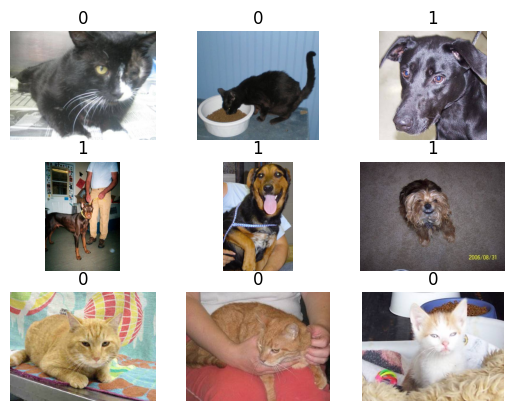

In [ ]:
import torch
import os
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2


cat_dataset = []
dog_dataset = []

dir = r"/home/plorenc/Desktop/AiR_ISS/ML/datasets"

for root, subfolders, files in os.walk(dir): 
    for file in files:
        file_path = os.path.join(root, file) 
        if "cat" in file.lower():
            cat_dataset.append((file_path, 0))
        elif "dog" in file.lower():
            dog_dataset.append((file_path, 1)) 


combined = cat_dataset + dog_dataset
random.shuffle(combined)

train_dir, test_dir = train_test_split(combined, test_size=0.2, random_state=42)
test_dir, val_dir = train_test_split(test_dir, test_size=0.2, random_state=42)

fig, axes = plt.subplots(3, 3)

axes = axes.flatten()

for i in range(3*3):
    random_dir = train_dir[random.randint(0, len(train_dir))]
    image = cv2.imread(random_dir[0])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].set_axis_off()
    axes[i].set_title(random_dir[1]) 

(array([1593.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1607.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

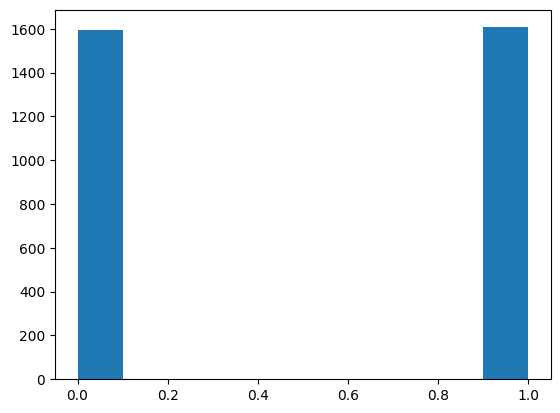

In [17]:
import numpy as np

plt.hist(np.array([label for _, label in train_dir]))

In [26]:
from torch.utils.data import Dataset,DataLoader
import torchvision
from torchvision import transforms


class CatDogDataset(Dataset):
    def __init__(self, data):
        """
        data: Lista krotek (ścieżka_do_obrazu, etykieta)
        """
        self.data = data
        
        self.transform = transforms.Compose([
            transforms.ToPILImage(), 
            transforms.Resize((256, 256)),  
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
        ])

    def __getitem__(self, index):
        """
        Zwraca obraz i etykietę dla danego indexu
        """
        image_path, label = self.data[index]
        
        # Wczytanie obrazu
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
        
        if self.transform:
            image = self.transform(image)
        
        return image, torch.tensor(label, dtype=torch.float32)

    def __len__(self):
        """
        Zwraca liczbę elementów w zbiorze danych
        """
        return len(self.data)

train_data = CatDogDataset(train_dir)
test_data = CatDogDataset(test_dir)
val_data = CatDogDataset(val_dir)

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)
val_dataloader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0322802..2.64].


(-0.5, 255.5, 255.5, -0.5)

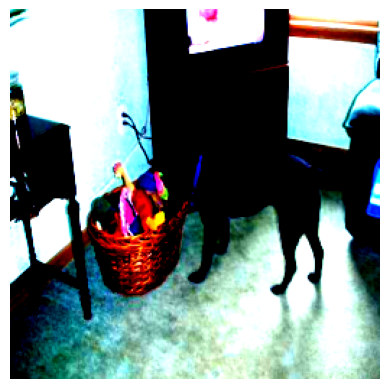

In [27]:
plt.imshow(np.array(next(iter(train_dataloader))[0][0]).transpose(1, 2, 0))
plt.axis('off')

In [20]:
from torch import optim

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.BCELoss()

EPOCHS = 10

import torch
import torch.nn as nn
from torch import optim

def train(model, train_loader, loss_fn, optimizer, device):
    model.train()  # Ustawienie modelu w tryb treningowy
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    return avg_loss


def validate(model, val_loader, loss_fn, device):
    model.eval() 
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad(): 
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = loss_fn(outputs.squeeze(), labels)
            running_loss += loss.item()
            predicted = (outputs.squeeze() > 0.5).float() 
            correct += (predicted == labels).sum().item()  
            total += labels.size(0) 

    avg_loss = running_loss / len(val_loader)
    accuracy = 100 * correct / total 
    return avg_loss, accuracy


In [ ]:
from tqdm.auto import tqdm


for epoch in tqdm(range(EPOCHS)):
    # Trening
    train_loss = train(model, train_dataloader, loss_fn, optimizer, device)
    
    # Walidacja
    val_loss, val_accuracy = validate(model, val_dataloader, loss_fn, device)
    
    # Drukowanie wyników
    print(f"Epoch [{epoch+1}/{EPOCHS}]:")
    print(f"  Training Loss: {train_loss:.4f}")
    print(f"  Validation Loss: {val_loss:.4f}")
    print(f"  Validation Accuracy: {val_accuracy:.2f}%")

/home/plorenc/Desktop/AiR_ISS/OpenCL/lab3/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 10%|█         | 1/10 [00:19<02:58, 19.79s/it]

Epoch [1/10]:
  Training Loss: 0.7668
  Validation Loss: 0.6786
  Validation Accuracy: 62.50%


 20%|██        | 2/10 [00:39<02:36, 19.52s/it]

Epoch [2/10]:
  Training Loss: 0.6405
  Validation Loss: 0.6375
  Validation Accuracy: 61.25%


 30%|███       | 3/10 [00:58<02:15, 19.43s/it]

Epoch [3/10]:
  Training Loss: 0.6052
  Validation Loss: 0.5860
  Validation Accuracy: 71.25%


 40%|████      | 4/10 [01:19<02:00, 20.06s/it]

Epoch [4/10]:
  Training Loss: 0.5289
  Validation Loss: 0.5424
  Validation Accuracy: 72.50%


 50%|█████     | 5/10 [01:39<01:40, 20.06s/it]

Epoch [5/10]:
  Training Loss: 0.4239
  Validation Loss: 0.5709
  Validation Accuracy: 76.25%


 60%|██████    | 6/10 [01:58<01:19, 19.75s/it]

Epoch [6/10]:
  Training Loss: 0.2895
  Validation Loss: 0.5585
  Validation Accuracy: 75.62%


 70%|███████   | 7/10 [02:18<00:58, 19.61s/it]

Epoch [7/10]:
  Training Loss: 0.1572
  Validation Loss: 0.7898
  Validation Accuracy: 73.75%


 80%|████████  | 8/10 [02:36<00:38, 19.41s/it]

Epoch [8/10]:
  Training Loss: 0.0644
  Validation Loss: 0.9411
  Validation Accuracy: 75.62%


 90%|█████████ | 9/10 [02:55<00:19, 19.18s/it]

Epoch [9/10]:
  Training Loss: 0.0199
  Validation Loss: 1.3353
  Validation Accuracy: 74.38%


100%|██████████| 10/10 [03:14<00:00, 19.45s/it]

Epoch [10/10]:
  Training Loss: 0.0323
  Validation Loss: 1.4861
  Validation Accuracy: 71.88%
